In [1]:
from IPython.core.display import HTML
css_file = './stylesheets/custom.css'
HTML(open(css_file, "r").read())

<div><img src="https://raw.githubusercontent.com/ACM-SIAM-KAUST-chapter/python_tutorial_2017/gh-pages/images/acmchapterlogo.png" width="260px" style="float: left; margin-right: 3em">
<img src="https://raw.githubusercontent.com/ACM-SIAM-KAUST-chapter/python_tutorial_2017/gh-pages/images/siamchapterlogo.png" width="260px" style="float: right;"></div>
<h1 align="center">Plotting and Visualization</h1>

<p><br style="clear: both;"/></p><p><br style="clear: both;"/></p><p><br style="clear: both;"/></p>

<div style="color:#5f5c48">
This tutorial is prepared by ACM/SIAM Student Chapter of King Abdullah University of Science and Technology (KAUST).
<br/><br/>

Parts of this tutorial re-use <a href="https://github.com/jrjohansson/scientific-python-lectures/">Scientific Python lectures</a> by <a href="https://github.com/jrjohansson">Robert Johansson</a> linsensed under <a href="https://creativecommons.org/licenses/by/3.0/">Creative Commons Attribution 3.0</a>.
<br/><br/>

**Prerequisites:** *Basic knowledge of Python, Numpy package.*
</div>

## Matplotlib

[`Matplotlib`](http://matplotlib.org/) is the basic package of Python for plotting.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The first line above ensures that our plots appear in the browser, instead in a separate window. The second line imports  the `pyplot` package

Let's see a very simple example. Suppose we want to plot the function $\sin(\exp(x))$ on the interval $x\in(0,\pi)$. We'll want to use the `numpy` functions of the sine and exponential functions. (Note: the math module operates only on scalars so we *should* use `numpy` in such cases)

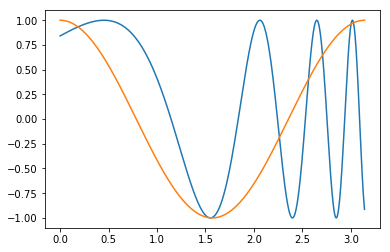

In [3]:
x = np.linspace(0,np.pi,1000)
f = np.sin(np.exp(x))
g = np.cos(2*x)
plt.plot(x,f)
plt.plot(x,g)

There are several ways to format a plot in Python. Here we just mention only the basic functionality. It's straightforward to use them and you will generally only get into its advanced functionality if you are customizing the look of a plot for a publication. `Matplotlib` documentation is very good, have a look [here](http://matplotlib.sourceforge.net/users/pyplot_tutorial.html). You can also read [this tutorial](http://www.loria.fr/~rougier/teaching/matplotlib) for an easy start. More references are listed at the end of this tutorial.

The following code does the basic formatting for the plot above:

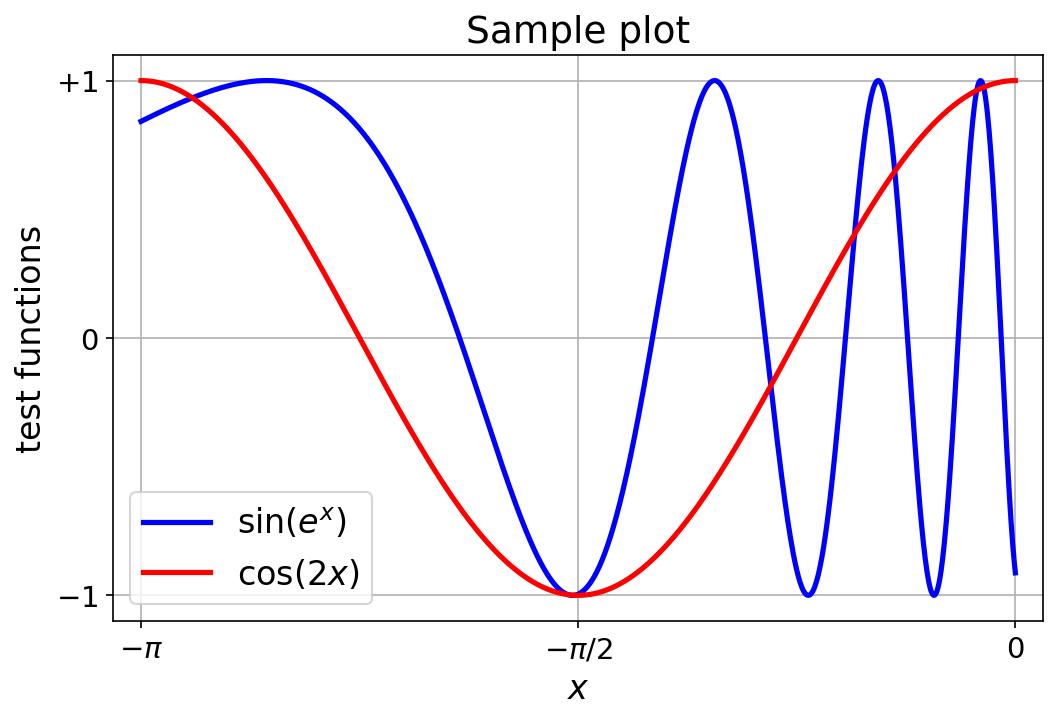

In [4]:
plt.figure(figsize=(8,5), dpi=150) # changing figure's shape
plt.xlim(x.min()-0.1, x.max()+0.1) # adjusting horizonatal axis limits
plt.ylim(f.min()-0.1, f.max()+0.1) # adjusting vertical axis limits
plt.xticks([0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'],fontsize=14) # setting ticks
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'],fontsize=14) # setting ticks

plt.plot(x, f, color="blue", linewidth=2.5, linestyle="-", label="$\sin(e^x)$") # changing color and thickness
plt.plot(x, g, color="red",  linewidth=2.5, linestyle="-",  label="$\cos(2x)$") # changing color and thickness
plt.legend(loc='lower left',prop={'size':16}) # placing legend on bottom left
plt.xlabel('$x$',fontsize=16) # horizontal axis name
plt.ylabel('test functions',fontsize=16) # vertical axis name
plt.title('Sample plot',fontsize=18) # title
plt.grid(True) # enabling grid
plt.savefig('trig_functions.pdf')

**One thing to be aware of is that by default, the *figure* object is cleared at the end of each cell.**

You will need to issue all plotting commands for a single figure in a single cell.

In [5]:
plt.savefig('trig_functions.pdf')

In [6]:
plt.savefig?

Go on and open the *pdf* file. It is empty! Now uncomment the save line in the block where the figure is plotted.

### 3D-plotting

The following example is adapted from [this tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb). Let's define the following function:

In [7]:
alpha = 0.7
phi_ext = 2*np.pi*0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2*np.cos(phi_p)*np.cos(phi_m) - alpha*np.cos(phi_ext - 2*phi_p)

Now create a mesh and evaluate the function over that mesh:

In [8]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

Plot the surface:

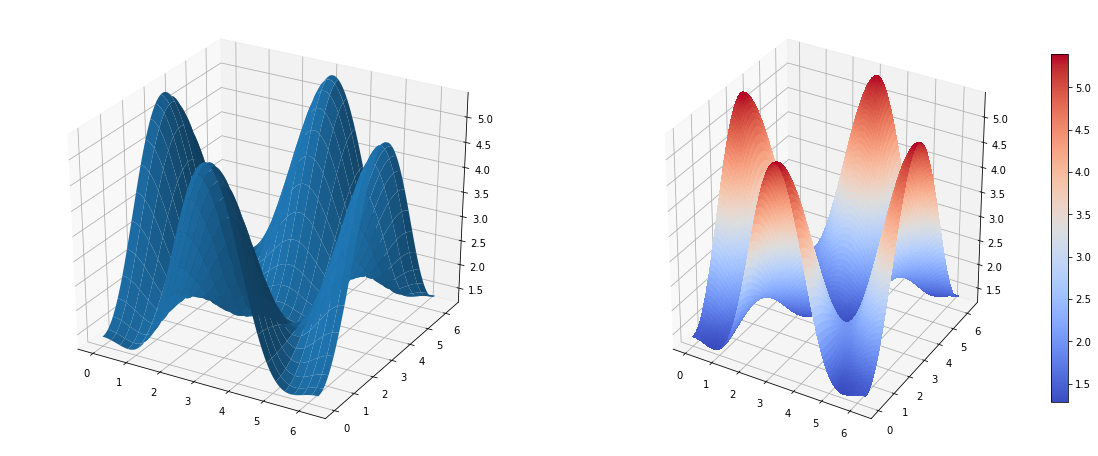

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D # imports 3D plotting
from matplotlib import cm # module for color pattern
fig = plt.figure(figsize=(20,8))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.8) # enables colorbar

## Better control over plotting

So far, we used **`matplotlib.pyplot`** module directly to produce plots. Sometimes we need more control over the the plots position, axes, insets, etc. We might also need to create different figures, or add different axes, put insets, etc. The following commands demonstrate this functionality.

In [10]:
# Let's generate some synthetic data
data = np.random.uniform(size=(100,2))
x, y = data[:,0], data[:,1]

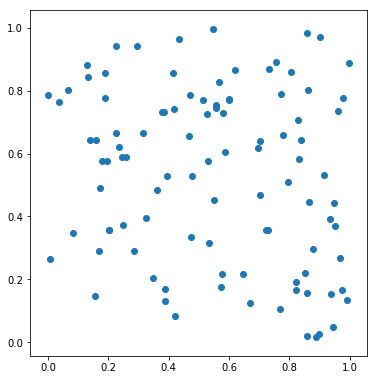

In [11]:
# Let's create a figure object and an axes object
# Don't forget to create figures and axes in the cell you are plotting!
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_axes([0.10,0.20,0.78,0.80])  # left, bottom, width, height

from matplotlib import rcParams
rcParams.update({'font.size': 16}) # change fontsize of all elements (ticks, labels, title)

ax1.scatter(x, y, marker='o')

# Exercise: Specify a title and the axes labels
# Hint: Use ax1. and press tap or print(dir(ax1))


### Insets through multiple axes

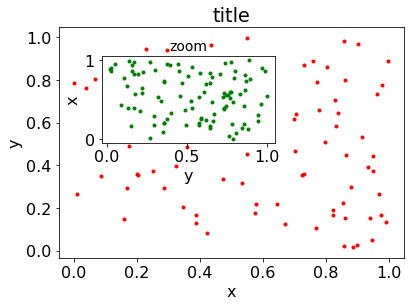

In [12]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r.')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g.')
axes2.set_xlabel('y')
axes2.set_ylabel('x')

# Exerice: add a title to the inset with a font size of 14px
axes2.set_title('zoom',fontsize=14)

What if you want to enlarge some region of the figure and show it in the inset? Let's how we can do that.

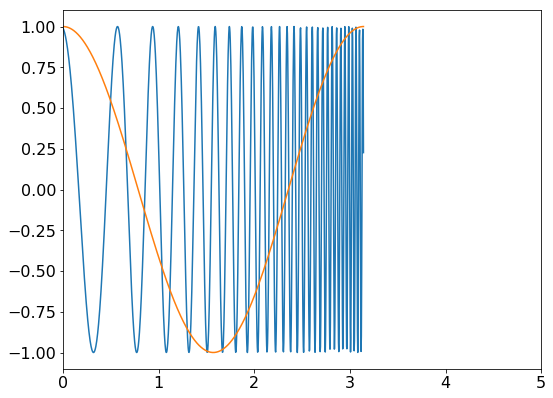

In [13]:
x = np.linspace(0,np.pi,1000)
f = np.sin(8*np.exp(x))
g = np.cos(2*x)

# How to enlarge a region on a plot?
fig = plt.figure(figsize=(8, 6))
ax  = fig.add_axes([0.15,0.11,0.83,0.83])
ax.set_xlim([0, 5])
ax.plot(x,f)
ax.plot(x,g)

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
zoomed_inset_axes?

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x10d0673c8>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x10c7787b8>)

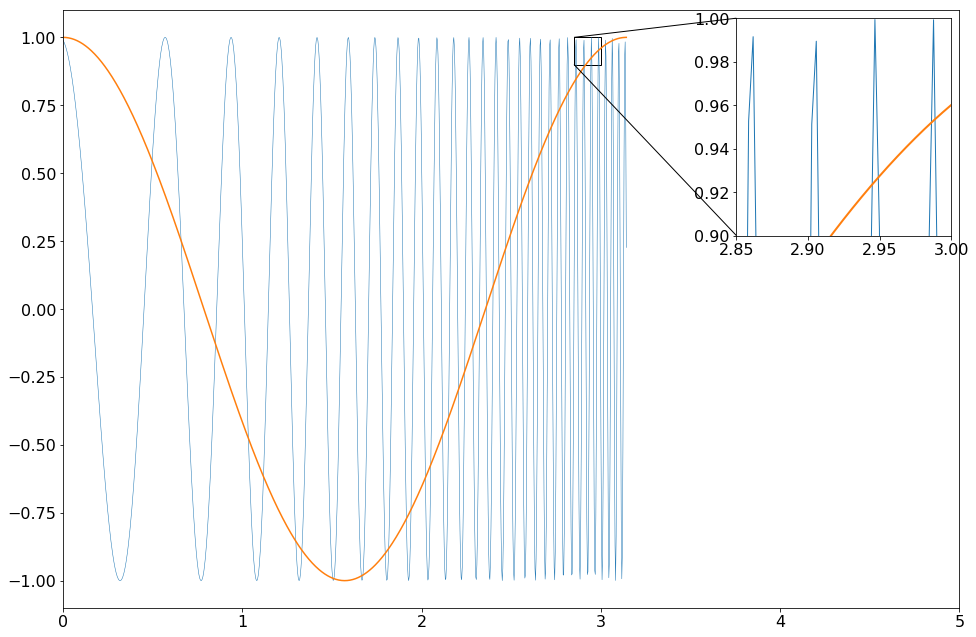

In [15]:
fig = plt.figure(figsize=(15, 10))
ax  = fig.add_axes([0.15,0.11,0.83,0.83])
ax.set_xlim([0, 5])
ax.plot(x,f,linewidth=0.5)
ax.plot(x,g)

# The inset axes
axins = zoomed_inset_axes(ax, 8, loc=1)
axins.plot(x, f, linewidth=1)
axins.plot(x, g, linewidth=2)
axins.set_xlim([2.85, 3.0])
axins.set_ylim([0.9, 1.0])

# Mark inset
mark_inset(ax, axins, loc1=3, loc2=2, fc="none", ec="0")

**`Matplotlib`** is a very rich library, and it has the functionality for literally any kind of plotting. For more references, you can check out a very detailed [User Guide](http://matplotlib.org/users/) and the links at the bottom of this notebook.

## Seaborn: Beautiful and easy plot styling

A recently developed [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) package provides many different options of how to control the plot aesthetics. Let's look at some examples.

**Note:** In case you don't have Seaborn installed, then run in a terminal

`$ conda install Seaborn`

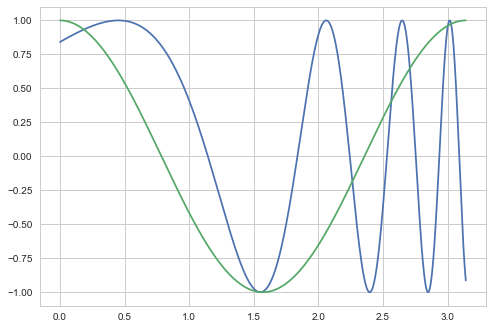

In [16]:
# A very quick enhancement by just importing seaborn
import seaborn as sns
sns.set_style("whitegrid")

x = np.linspace(0,np.pi,1000)
f = np.sin(np.exp(x))
g = np.cos(2*x)
plt.plot(x,f)
plt.plot(x,g)

In [17]:
sns.set_style?

For example the following gives a horizontal boxplot of the distribution of tips:

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

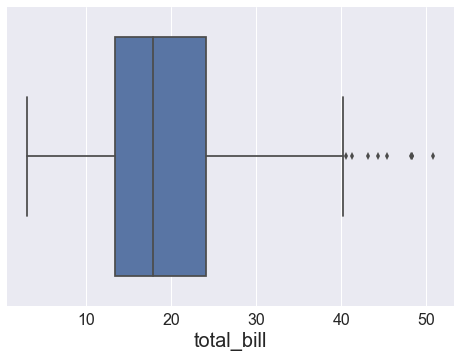

In [18]:
tips = sns.load_dataset("tips")
print(tips)
sns.set() # reset setttings
ax = sns.boxplot(x=tips["total_bill"])
ax.tick_params(labelsize=16)
ax.xaxis.label.set(size=20)

In [19]:
# What are the styles and how to override them?
sns.set_style("whitegrid")
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

### Color paletes available in `seaborn`

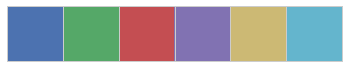

In [20]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

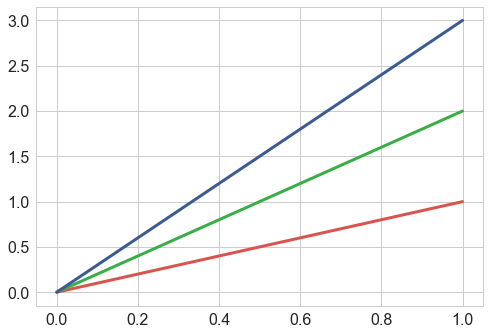

In [21]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Animations

There are many more fancy things to do with Python visualization package. 
For example we can create animations. 

The code below uses the solution of the [Woodward-Colella blast wave problem](http://clawpack.github.io/doc/pyclaw/gallery/woodward_colella_blast.html) solved by the [Clawpack package](http://clawpack.github.io/index.html).

First we import the necessary packages. There several ways to make animations in Python; here we describe a simple one.
Note that in the cell below the command *%matplotlib nbagg* in needed so as the animation is created within the notebook.

In [22]:
%matplotlib nbagg
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

First make some functions to read data (solution and time) from files.
The data files are located at *data/session3/woodward_colella_blast* starting form the directory of this notebook.
They contain the solution (density, momentum, energy) of the Euler equations in 1D solved up to time $t = 0.38$ over the interval $[0,1]$.

You may first open a data file to get familiar with the way the data is stored.
This will help you understand how to read the data we want to create an animation of the solution.

In [23]:
def solution(filename, path='data/session3/woodward_colella_blast'):
    """
    This function reads the solution stored in an 
    ascii file written by pyclaw.
    """
    import sys
    
    # Concatenate path and file name
    pathfilename = path + "/" + filename

    try:
        f = open(pathfilename,"r")
    except IOError:
        raise IOError("No data file was found.")

    # Read file header
    # The information contained in the first two lines are not used.
    unused = f.readline()  # grid_number
    unused = f.readline()  # AMR_level

    # Read mx, my, xlow, ylow, dx and dy
    line = f.readline()
    sline = line.split()
    mx = int(sline[0])

    line = f.readline()
    sline = line.split()
    xlower = float(sline[0])

    line = f.readline()
    sline = line.split()
    dx = float(sline[0])

    # Grid:
    xupper = xlower + mx * dx
    xc = np.linspace(xlower+dx/2.,xupper-dx/2.,mx)  
    
    # Read solution
    # Define arrays of conserved variables
    q = np.zeros((3,mx))

    line = f.readline()
    for j in range(mx):
        line = f.readline()
        q[:,j] = np.array(line.split())
    
    return q, xc

def time(filename, path='data/session3/woodward_colella_blast'):
    """
    This function reads the time stored in an 
    ascii file written by pyclaw.
    """
    import sys
    
    # Concatenate path and file name
    pathfilename = path + "/" + filename

    try:
        f = open(pathfilename,"r")
    except IOError:
        raise IOError("No data file was found.")

    # Read time
    line = f.readline()
    sline = line.split()
    t = float(sline[0])

    return t

The following cell gives the functions used for the animation.

In [24]:
def fplot(i):
    index = "%02d" % i
    q, xc = solution('fort.q00' + index)
    t = time('fort.t00' + index)
    line.set_data(xc, q[0,:])
    ax.set_title('Density at t='+str(t),fontsize=26)
    return line

def init():
    line.set_data([], [])
    return line,

We can now create the animation:

<IPython.core.display.Javascript object>


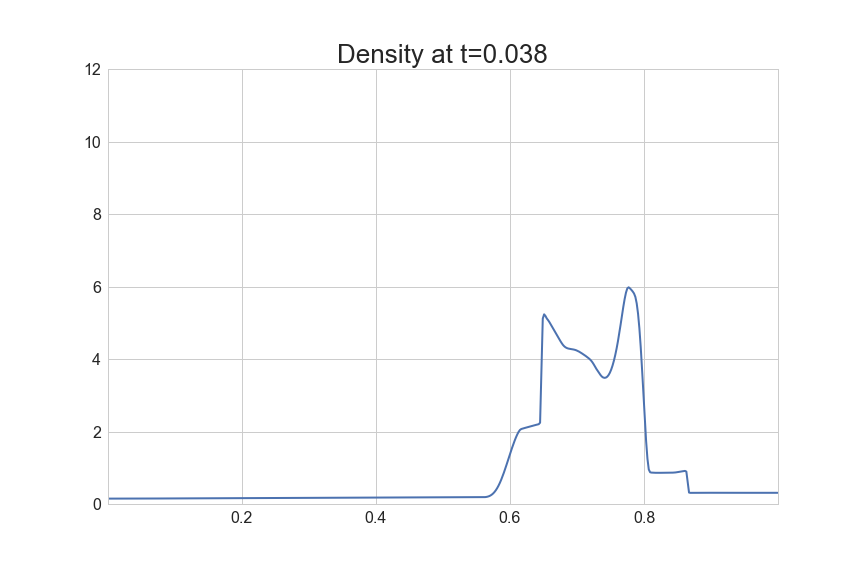

In [25]:
%matplotlib nbagg
from matplotlib import rcParams
rcParams.update({'font.size': 16}) # change fontsize of all elements (ticks, labels, title)

# initial data
_, xc = solution('fort.q0000')
fig = plt.figure(figsize=[12,8])
ax = plt.axes(xlim=(xc[0], xc[-1]), ylim=(0, 12))
plt.xticks(fontsize=16)
plt.yticks(fontsize =16)
line, = ax.plot([], [], lw=2)

# animation 
animation.FuncAnimation(fig, fplot, frames=11, init_func=init, blit=True, interval=500, repeat=True)

## References:

- [Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users)
- [Hans Petter Langtangen book](http://link.springer.com/book/10.1007/978-3-642-02475-7/page/1)


#### Matplotlib

- [Nicolas P. Rougier matplotlib tutorial](http://www.loria.fr/~rougier/teaching/matplotlib/)
- [Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
- [Matplotlib gallery](http://matplotlib.org/gallery.html)

#### Other visualization packages
- [Seaborn styling package tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html)

*Copyright 2017, Yiannis Hadjimichael, ACM/SIAM Student Chapter.*